In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

In order to make the numbers predictable we keep defined seed

In [58]:
np.random.seed(101)
tf.random.set_seed(101)

Generating random linear data
There will be 50 data points between 1 to 50

In [59]:
x=np.linspace(0,50,50)
y=np.linspace(0,50,50)
#adding noise
x+=np.random.uniform(-4,4,50)
y+=np.random.uniform(-4,4,50)
n=len(x)

Visualizing the data points

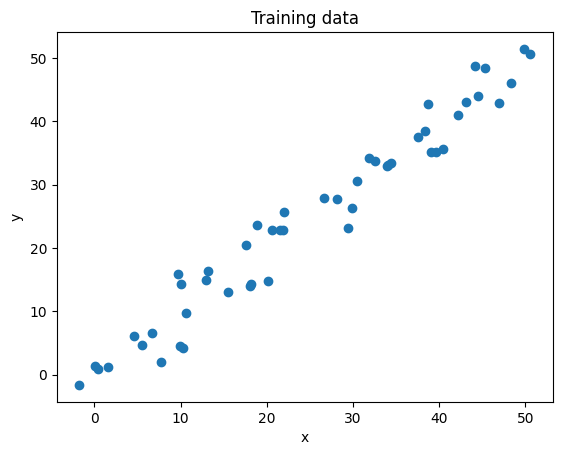

In [60]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.show()

In [61]:
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")
#now we create trainable tensorflow weights and biases
W=tf.Variable(np.random.randn(),name="W")
b=tf.Variable(np.random.randn(),name="b")
#now we initialize the hyperparameters
learning_rate = 0.01
training_epochs = 1000
#Operations to be performed
y_pred = tf.add(tf.multiply(X, W),b)
cost = tf.reduce_sum(tf.pow(y_pred-Y,2))/(2*n)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.compat.v1.global_variables_initializer()

Now we begin training inside contuns


In [62]:
with tf.compat.v1.Session()as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for(_x,_y) in zip(x,y):
            sess.run(optimizer,feed_dict={X:_x,Y:_y})
        #Displaying the result at every 50th epoch
        if (epoch+1)%50 == 0:
            #Calculating the cost at every 50th epoch 
            c = sess.run(cost,feed_dict={X:x,Y:y})
            print("Epoch : ",epoch,"\nCost : ",c,"\nW :",sess.run(W),"\nb :",sess.run(b))
    #storing necessary values to be used outside the session
    training_cost = sess.run(cost,feed_dict={X:x,Y:y})
    weight = sess.run(W)
    bias = sess.run(b)
predictions = weight*x + bias
print("Training cost = ",training_cost,"\nWeight = ",weight,"\nbias = ",bias)

Epoch :  49 
Cost :  5.8868036 
W : 0.9951241 
b : 1.238105
Epoch :  99 
Cost :  5.7912693 
W : 0.99812365 
b : 1.0914395
Epoch :  149 
Cost :  5.7119675 
W : 1.0008028 
b : 0.96044284
Epoch :  199 
Cost :  5.6459413 
W : 1.0031956 
b : 0.84343934
Epoch :  249 
Cost :  5.5907993 
W : 1.0053328 
b : 0.7389355
Epoch :  299 
Cost :  5.544608 
W : 1.007242 
b : 0.6455921
Epoch :  349 
Cost :  5.5057893 
W : 1.008947 
b : 0.56221986
Epoch :  399 
Cost :  5.473065 
W : 1.01047 
b : 0.48775342
Epoch :  449 
Cost :  5.445385 
W : 1.0118302 
b : 0.42124158
Epoch :  499 
Cost :  5.4219036 
W : 1.0130452 
b : 0.36183482
Epoch :  549 
Cost :  5.4019217 
W : 1.0141305 
b : 0.30877408
Epoch :  599 
Cost :  5.3848557 
W : 1.0150996 
b : 0.2613811
Epoch :  649 
Cost :  5.370246 
W : 1.0159653 
b : 0.21905078
Epoch :  699 
Cost :  5.3576994 
W : 1.0167387 
b : 0.18124203
Epoch :  749 
Cost :  5.3468933 
W : 1.0174294 
b : 0.14747237
Epoch :  799 
Cost :  5.337558 
W : 1.0180461 
b : 0.11730931
Epoch : 

Text(0.5, 1.0, 'Linear Regression Model')

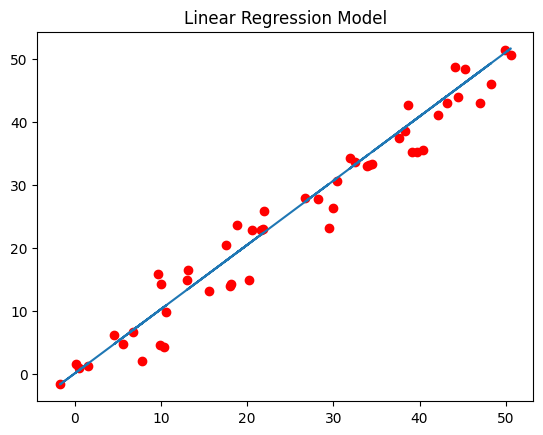

In [63]:
plt.plot(x,y,'ro',label = 'Original Data')
plt.plot(x,predictions,label='Fitted line')
plt.title('Linear Regression Model')